# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
sample_10 = np.random.normal(50,5,10)
sample_50 = np.random.normal(50,5,50)
sample_500 = np.random.normal(50,5,500)
sample_5000 = np.random.normal(50,5,5000)

In [3]:
scipy.stats.normaltest(sample_10)

/Users/adriaferrer/Library/Python/3.7/lib/python/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.1120780670182852, pvalue=0.9455022289002002)

In [4]:
scipy.stats.normaltest(sample_50)

NormaltestResult(statistic=4.2442301800023605, pvalue=0.11977801911206491)

In [5]:
scipy.stats.normaltest(sample_500)

NormaltestResult(statistic=2.843829996178533, pvalue=0.2412515779427087)

In [6]:
scipy.stats.normaltest(sample_5000)

NormaltestResult(statistic=0.21221038279514745, pvalue=0.8993300413161766)

#### Interpret the normaltest results and make your observations.

*Interpretation*

scipy.stats.normaltest returns 2 values:

1) s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest

2) A 2-sided chi squared probability for the hypothesis test

1) Should only be used for n>20, as the second test (k) is valid only for n>20. Both statistics (k and s) provide information about the type and magnitude of departures from normality. 
(from https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics and http://www.columbia.edu/~ld208/psymeth97.pdf)
Kurtosis (k) is a measure of the combined sizes of the two tails.  It measures the amount of probability in the tails.  The value is often compared to the kurtosis of the normal distribution, which is equal to 3.  If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails).  If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution (less in the tails).  
Skewness (s)is usually described as a measure of a dataset’s symmetry – or lack of symmetry.   A perfectly symmetrical data set will have a skewness of 0.   The normal distribution has a skewness of 0. 

2) (https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/summary-statistics/normality-test/interpret-the-results/key-results/) To determine whether the data do not follow a normal distribution, compare the p-value to the significance level. Usually, a significance level (denoted as α or alpha) of 0.05 works well. In these results, the null hypothesis states that the data follow a normal distribution. Because the p-value is greater than the significance level of 0.05, the decision is to fail to reject the null hypothesis. You cannot conclude that the data do not follow a normal distribution.

Using statistic 2), none of the samples obatained follow a normal distribution.

#### Step 2: Plot normal distributions

Use matplotlib to plot a histogram of each sample. 

*Hints:*

- Your outputs should look like below:

![normal distributions with different sample sizes](ch-1.png)

(array([1., 0., 2., 0., 1., 2., 2., 0., 0., 2.]),
 array([42.60130783, 44.17013264, 45.73895745, 47.30778227, 48.87660708,
        50.44543189, 52.01425671, 53.58308152, 55.15190633, 56.72073115,
        58.28955596]),
 <a list of 10 Patch objects>)

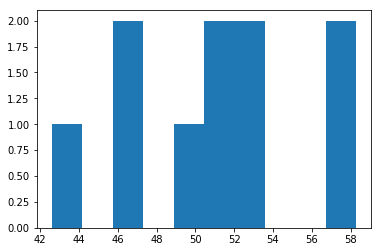

In [7]:
# Your code here
matplotlib.pyplot.hist(sample_10)

(array([ 1.,  1.,  0.,  2.,  9., 14., 10.,  6.,  3.,  4.]),
 array([33.77322567, 36.40184298, 39.03046029, 41.65907761, 44.28769492,
        46.91631224, 49.54492955, 52.17354687, 54.80216418, 57.43078149,
        60.05939881]),
 <a list of 10 Patch objects>)

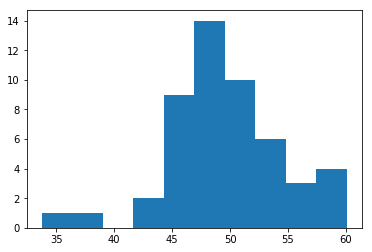

In [8]:
matplotlib.pyplot.hist(sample_50)

(array([  7.,  24.,  55.,  80., 118.,  81.,  68.,  50.,  13.,   4.]),
 array([36.48134055, 39.23782142, 41.99430229, 44.75078316, 47.50726403,
        50.26374489, 53.02022576, 55.77670663, 58.5331875 , 61.28966837,
        64.04614924]),
 <a list of 10 Patch objects>)

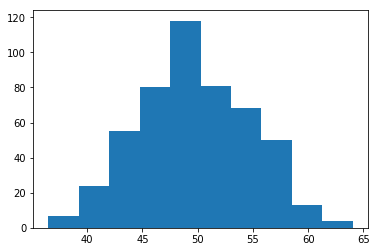

In [9]:
matplotlib.pyplot.hist(sample_500)

(array([  25.,  105.,  389.,  864., 1281., 1184.,  751.,  305.,   80.,
          16.]),
 array([33.62932911, 36.99476476, 40.36020041, 43.72563606, 47.0910717 ,
        50.45650735, 53.821943  , 57.18737865, 60.5528143 , 63.91824995,
        67.2836856 ]),
 <a list of 10 Patch objects>)

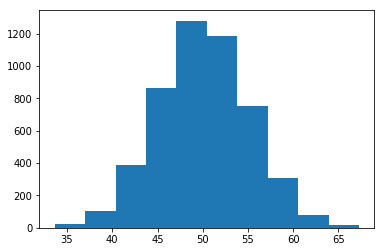

In [10]:
matplotlib.pyplot.hist(sample_5000)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

The Central Limit Theorem (CLT) is a statistical theory states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population.
Hence, if we repeatedly take independent random samples of size n from any population, then when n is large, the distribution of the sample means will approach a normal distribution

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

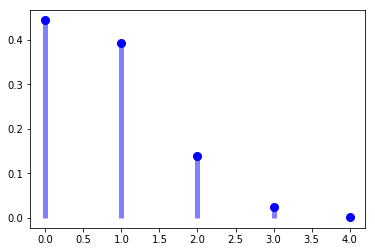

In [11]:
# Your code here
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n = 5
p = 0.15
x = np.arange(binom.ppf(0.0000001, n, p), binom.ppf(0.9999999, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

#### Explain what you observe from the plot above

The plot above shows that there is around a 44% chance of 0 people watching the AD, around 39% chance of 1 person watching it, around 13% chance of 2 people watching it, 2% of 3 and almost 0% chance of 4 or 5 people watching it.

#### Now plot PMP with 50, 500, and 5000 visitors.

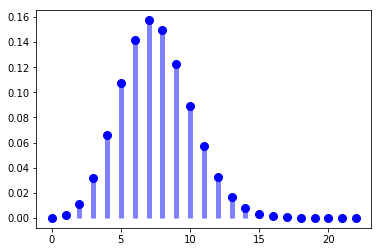

In [12]:
# Your code here
fig, ax = plt.subplots(1, 1)

n = 50
p = 0.15
x = np.arange(binom.ppf(0.0000001, n, p), binom.ppf(0.9999999, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

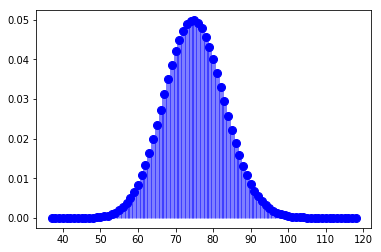

In [13]:
fig, ax = plt.subplots(1, 1)

n = 500
p = 0.15
x = np.arange(binom.ppf(0.0000001, n, p), binom.ppf(0.9999999, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

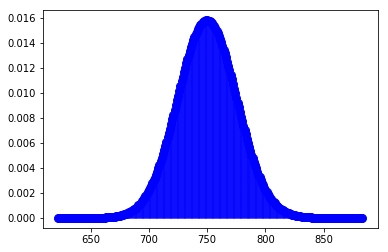

In [14]:
fig, ax = plt.subplots(1, 1)

n = 5000
p = 0.15
x = np.arange(binom.ppf(0.0000001, n, p), binom.ppf(0.9999999, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

#### What did you notice from the distribution plots? Comment your findings.

The higher the n, the more "normalized" the distribution is. This means that if we could make the n infinite, the binomial distribution would become continuous and thus a normal distribution.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

The Poisson distribution is a discrete probability function. It is usually used to represent the occurence of events over a certain period of time. It is derived from the binomial but with n limiting to inifinity

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [20]:
# Your code here
fig, ax = plt.subplots(1, 1)



TypeError: cannot unpack non-iterable rv_frozen object

#### What is the probability of getting 60 visits?

In [16]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

In [17]:
# your code here

# Challenge 4 - Central Limit Theorem

#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [18]:
# Your answer here

#### b. What is the probablity that in total, it takes more than 115 hours to deliver all 200 packages?

In [19]:
# Your answer here